In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('insurance.csv')

data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
data.isna().any()

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool

In [5]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
regions = data.region.unique()
regions

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

---

In [7]:
from scipy.stats import f_oneway


df = data[['region', 'bmi']]

groups = df.groupby('region').groups

sw = df.bmi[groups['southwest']]
se = df.bmi[groups['southeast']]
nw = df.bmi[groups['northwest']]
ne = df.bmi[groups['northeast']]

f_oneway(sw, se, nw, ne)

F_onewayResult(statistic=39.49505720170283, pvalue=1.881838913929143e-24)

---

In [8]:
import statsmodels.api as sm
from scipy import stats
from statsmodels.formula.api import ols

In [9]:
model = ols('bmi ~ region', data=df).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
region,4055.880631,3.0,39.495057,1.881839e-24
Residual,45664.319755,1334.0,NaN,NaN


In [10]:
model.f_pvalue

1.881838913929143e-24

---

In [11]:
reg_pairs = []

for reg1 in range(0, 3):
    for reg2 in range(reg1 + 1, 4):
        reg_pairs.append([regions[reg1], regions[reg2]])
        
for reg1, reg2 in reg_pairs:
    print(reg1, reg2)
    result = stats.ttest_ind(df.bmi[groups[reg1]], df.bmi[groups[reg2]])
    print(result)
    alfa = 0.05 / 6
    print('Accept' if result[1] > alfa else 'Decline')

southwest southeast
Ttest_indResult(statistic=-5.908373821545118, pvalue=5.4374009639680636e-09)
Decline
southwest northwest
Ttest_indResult(statistic=3.2844171500398582, pvalue=0.001076958496307695)
Decline
southwest northeast
Ttest_indResult(statistic=3.1169000930045923, pvalue=0.0019086161671573074)
Decline
southeast northwest
Ttest_indResult(statistic=9.25649013552548, pvalue=2.643571405230106e-19)
Decline
southeast northeast
Ttest_indResult(statistic=8.790905562598699, pvalue=1.186014937424813e-17)
Decline
northwest northeast
Ttest_indResult(statistic=0.060307727183293185, pvalue=0.951929170821864)
Accept


Вес различается везде, кроме северо-запада и северо-востока

---

In [12]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

group1,group2,meandiff,p-adj,lower,upper,reject
northeast,northwest,0.0263,0.9999,-1.1552,1.2078,False
northeast,southeast,4.1825,-0.0,3.033,5.332,True
northeast,southwest,1.4231,0.0107,0.2416,2.6046,True
northwest,southeast,4.1562,-0.0,3.0077,5.3047,True
northwest,southwest,1.3968,0.0127,0.2162,2.5774,True
southeast,southwest,-2.7594,0.0,-3.9079,-1.6108,True


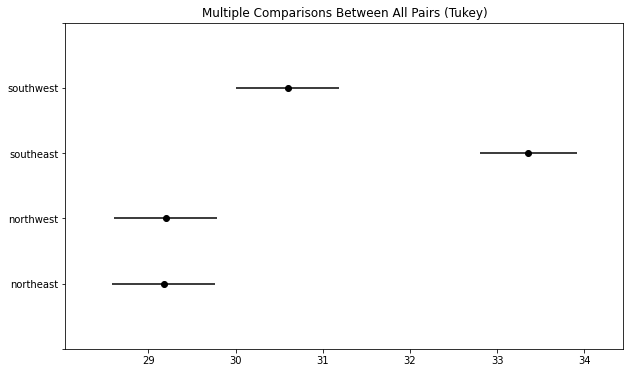

In [13]:
tukey = pairwise_tukeyhsd(endog=df.bmi, groups = df.region, alpha=0.05)
tukey.plot_simultaneous()
tukey.summary()

---

In [14]:
df_1 = data[['region', 'sex', 'bmi']]
df_1.head()

,region,sex,bmi
0,southwest,female,27.900
1,southeast,male,33.770
2,southeast,male,33.000
3,northwest,male,22.705
4,northwest,male,28.880


In [15]:
model = ols('bmi ~ C(region) + C(sex) + C(region):C(sex)', data=df_1).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(region),4034.975135,3.0,39.398134,2.163195e-24
C(sex),86.007035,1.0,2.519359,1.126940e-01
C(region):C(sex),174.157808,3.0,1.700504,1.650655e-01
Residual,45404.154911,1330.0,NaN,NaN


---

C:\Temp\ipykernel_11376\2013580510.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['combination'] = df_1.region + " / " + df_1.sex


group1,group2,meandiff,p-adj,lower,upper,reject
northeast / female,northeast / male,-0.2998,0.9998,-2.2706,1.6711,False
northeast / female,northwest / female,-0.0464,1.0,-2.0142,1.9215,False
northeast / female,northwest / male,-0.2042,1.0,-2.1811,1.7728,False
northeast / female,southeast / female,3.3469,0.0,1.41,5.2839,True
northeast / female,southeast / male,4.6657,0.0,2.7634,6.568,True
northeast / female,southwest / female,0.7362,0.9497,-1.2377,2.71,False
northeast / female,southwest / male,1.8051,0.1007,-0.1657,3.776,False
northeast / male,northwest / female,0.2534,0.9999,-1.7083,2.2152,False
northeast / male,northwest / male,0.0956,1.0,-1.8752,2.0665,False
northeast / male,southeast / female,3.6467,0.0,1.7159,5.5775,True


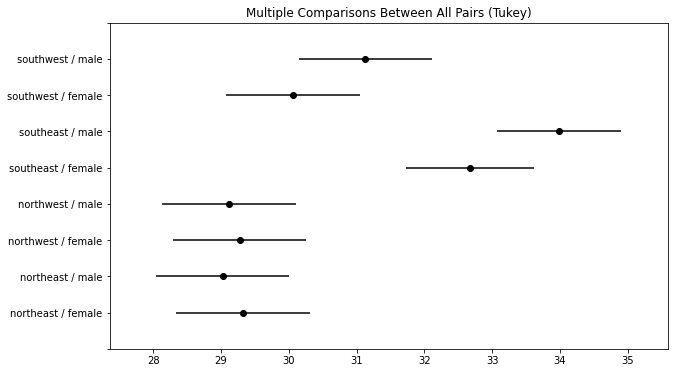

In [16]:
df_1['combination'] = df_1.region + " / " + df_1.sex
tukey = pairwise_tukeyhsd(endog=df_1.bmi, groups = df_1.combination, alpha=0.05)
tukey.plot_simultaneous()
tukey.summary()